In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Data Loading

In [2]:
BaseballDF = pd.read_csv ('https://raw.githubusercontent.com/jwcalder/MCFAM-Summer-School/master/Project%20Files/baseball.csv')
pd.set_option('display.max_columns', None)
BaseballDF.head(3)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,bb_type,balls,strikes,outs_when_up,inning,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score
0,FF,2019-09-17,92.3,1.312807,6.566688,Miguel Sano,593934,446321,home_run,hit_into_play_score,8,Miguel Sano homers (30) on a fly ball to left ...,R,R,L,MIN,CWS,fly_ball,1,2,1,3,482,113.5,25.1,91.2,2126.0,5.7,54.813555,4,4-Seam Fastball,2,0,2,0
1,SL,2019-08-03,80.3,1.410716,5.799800,Nelson Cruz,443558,518633,home_run,hit_into_play_score,7,Nelson Cruz homers (29) on a fly ball to left ...,R,R,L,MIN,KC,fly_ball,0,2,2,2,466,110.1,29.1,80.8,2356.0,6.4,54.125762,3,Slider,6,2,6,2
2,FF,2019-05-01,88.5,-2.087162,5.633251,Jonathan Schoop,570731,543521,home_run,hit_into_play_score,4,Jonathan Schoop homers (5) on a fly ball to le...,R,R,R,MIN,HOU,fly_ball,1,0,0,3,465,108.1,28.4,88.7,2201.0,6.5,54.011767,2,4-Seam Fastball,0,0,0,0


Data Cleaning

In [3]:
BaseballDF= BaseballDF.drop(columns = ['player_name', 'description', 'des', 'home_team', 'away_team', 'game_type', 'pitch_name',])
BaseballDF = pd.get_dummies(BaseballDF, columns=['stand', 'p_throws'])

label_encoder = LabelEncoder()

# Label encode 'pitch_type', 'game_date', and 'bb_type'
BaseballDF['pitch_type'] = label_encoder.fit_transform(BaseballDF['pitch_type'])
BaseballDF['game_date'] = label_encoder.fit_transform(BaseballDF['game_date'])
BaseballDF['bb_type'] = label_encoder.fit_transform(BaseballDF['bb_type'])

BaseballDF.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,zone,bb_type,balls,strikes,outs_when_up,inning,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,pitch_number,home_score,away_score,bat_score,fld_score,stand_L,stand_R,p_throws_L,p_throws_R
0,3,73,92.3,1.312807,6.566688,593934,446321,home_run,8,0,1,2,1,3,482,113.5,25.1,91.2,2126.0,5.7,54.813555,4,2,0,2,0,False,True,True,False
1,8,51,80.3,1.410716,5.799800,443558,518633,home_run,7,0,0,2,2,2,466,110.1,29.1,80.8,2356.0,6.4,54.125762,3,6,2,6,2,False,True,True,False
2,3,14,88.5,-2.087162,5.633251,570731,543521,home_run,4,0,1,0,0,3,465,108.1,28.4,88.7,2201.0,6.5,54.011767,2,0,0,0,0,False,True,False,True
3,3,71,94.1,2.399570,6.080978,443558,571578,home_run,3,2,3,2,1,3,460,111.7,27.5,95.6,2198.0,7.0,53.456906,6,1,3,1,3,False,True,True,False
4,7,48,95.4,0.662782,6.409376,593934,502154,home_run,6,0,2,1,1,8,457,111.6,27.8,94.5,1943.0,5.6,54.920100,4,9,10,9,10,False,True,True,False


In [4]:
# Assuming your DataFrame is named 'BaseballDF'
# Check for null values in each column
null_columns = BaseballDF.columns[BaseballDF.isnull().any()]

# Print the columns with null values
print("Columns with Null Values:")
print(BaseballDF[null_columns].isnull().sum())

Columns with Null Values:
release_spin_rate    31
dtype: int64


In [5]:
BaseballDF= BaseballDF.drop(columns = ['release_spin_rate'])
BaseballDF.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,zone,bb_type,balls,strikes,outs_when_up,inning,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_extension,release_pos_y,pitch_number,home_score,away_score,bat_score,fld_score,stand_L,stand_R,p_throws_L,p_throws_R
0,3,73,92.3,1.312807,6.566688,593934,446321,home_run,8,0,1,2,1,3,482,113.5,25.1,91.2,5.7,54.813555,4,2,0,2,0,False,True,True,False
1,8,51,80.3,1.410716,5.799800,443558,518633,home_run,7,0,0,2,2,2,466,110.1,29.1,80.8,6.4,54.125762,3,6,2,6,2,False,True,True,False
2,3,14,88.5,-2.087162,5.633251,570731,543521,home_run,4,0,1,0,0,3,465,108.1,28.4,88.7,6.5,54.011767,2,0,0,0,0,False,True,False,True
3,3,71,94.1,2.399570,6.080978,443558,571578,home_run,3,2,3,2,1,3,460,111.7,27.5,95.6,7.0,53.456906,6,1,3,1,3,False,True,True,False
4,7,48,95.4,0.662782,6.409376,593934,502154,home_run,6,0,2,1,1,8,457,111.6,27.8,94.5,5.6,54.920100,4,9,10,9,10,False,True,True,False


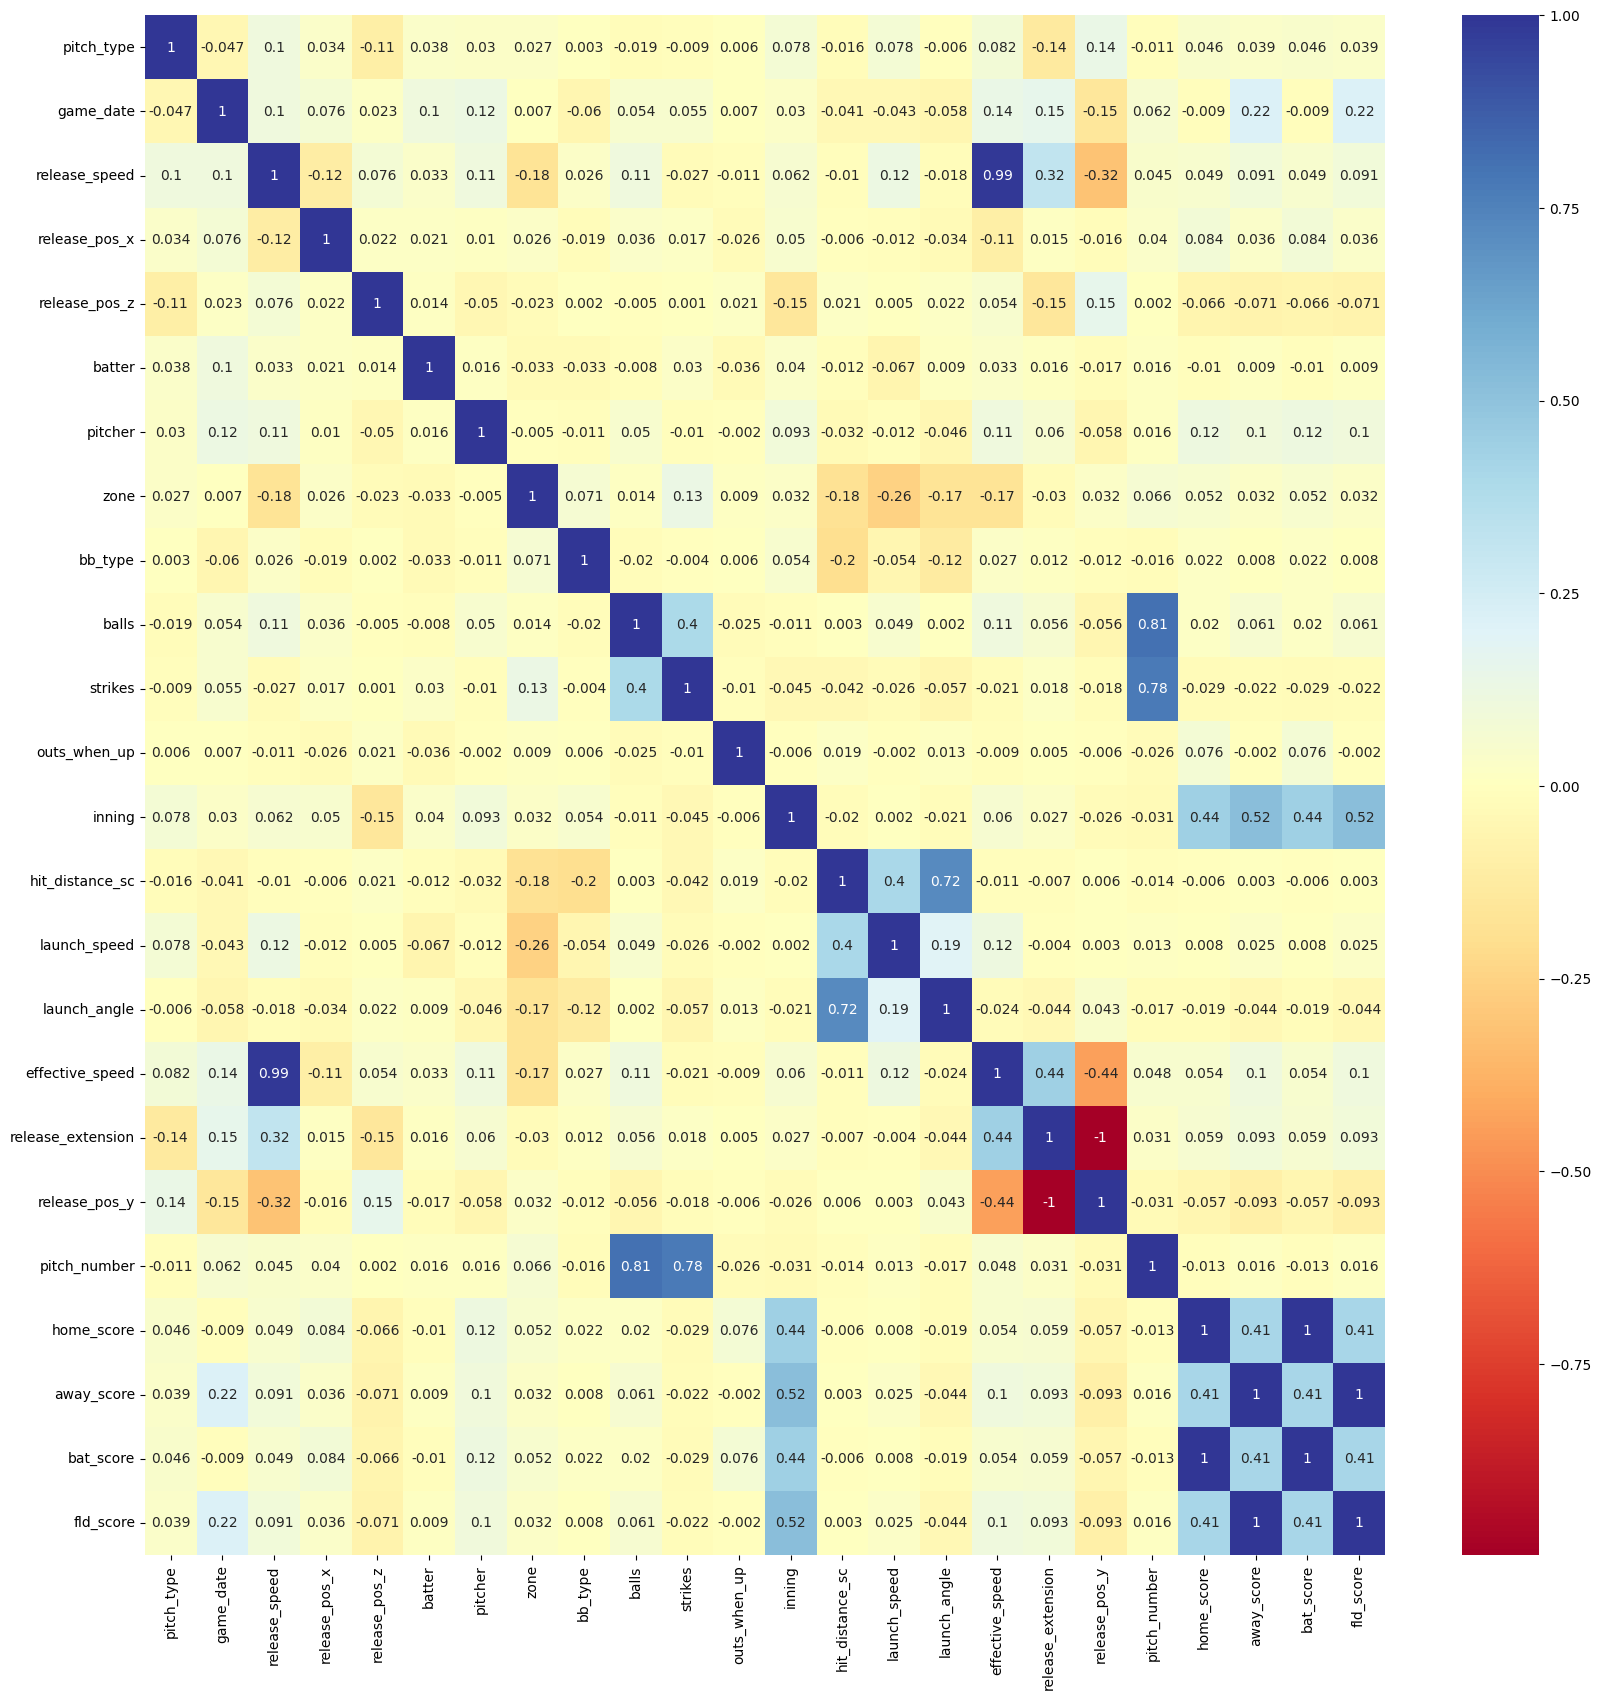

In [6]:
copyBDF = BaseballDF.select_dtypes(include='number')

correlation_matrix = copyBDF.corr().round(3)
plt.figure(figsize=(20,20))
sns.heatmap(data= correlation_matrix, cmap='RdYlBu', annot = True)
plt.show()


In [7]:
BaseballDF.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'batter', 'pitcher', 'events', 'zone', 'bb_type',
       'balls', 'strikes', 'outs_when_up', 'inning', 'hit_distance_sc',
       'launch_speed', 'launch_angle', 'effective_speed', 'release_extension',
       'release_pos_y', 'pitch_number', 'home_score', 'away_score',
       'bat_score', 'fld_score', 'stand_L', 'stand_R', 'p_throws_L',
       'p_throws_R'],
      dtype='object')

In [8]:
unique_classes = BaseballDF['events'].unique()

# Print the unique classes
print("Unique Classes:", unique_classes)
class_counts = BaseballDF['events'].value_counts()

# Print the counts for each class
print("Class Counts:")
print(class_counts)

Unique Classes: ['home_run' 'double' 'triple' 'field_out' 'field_error' 'single'
 'double_play' 'grounded_into_double_play' 'fielders_choice_out'
 'fielders_choice']
Class Counts:
events
field_out                    1269
single                        476
double                        195
home_run                      146
grounded_into_double_play      52
field_error                    19
triple                         12
fielders_choice_out             9
double_play                     8
fielders_choice                 3
Name: count, dtype: int64


In [9]:
praccy = ['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'batter', 'pitcher', 'zone', 'bb_type',
       'balls', 'strikes', 'outs_when_up', 'inning', 'hit_distance_sc',
       'launch_speed', 'launch_angle', 'effective_speed',
       'release_extension', 'release_pos_y', 'pitch_number', 'home_score',
       'away_score', 'bat_score', 'fld_score', 'stand_L', 'stand_R',
       'p_throws_L', 'p_throws_R']
x = BaseballDF[praccy].values
y = BaseballDF['events'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

**K NEAREST NEIGHBORS**

In [10]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
knAccuracy = accuracy_score(y_test, y_pred)
print(knAccuracy)

y_pred2 = classifier.predict(x_train)
knTrainAccuracy = accuracy_score(y_train, y_pred2)
print(knTrainAccuracy)

cm_kn = confusion_matrix(y_test, y_pred)


print(cm_kn)
#seems to be predicting field out almost every time

0.5474452554744526
0.5892748324192566
[[  0   0   0  41   0   0   0   0   4   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0]
 [  0   0   0 299   0   0   0   0  11   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0   2   0]
 [  0   0   0  38   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   1   0]
 [  0   0   0   3   0   0   0   0   0   0]]


In [11]:
results = []
results.append(["Classifier", "Training Accuracy", "Testing Accuracy"])
results.append(["K-Nearest Neighbors", knAccuracy, knTrainAccuracy])

matrices = []
matrices.append(cm_kn)

In [ ]:
"""
k_list = list(range(1,30,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy')
    cv_scores.append(scores.mean())

plt.figure()
plt.title('Performance of K Nearest Neighbors Algorithm')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.plot(k_list, cv_scores)

plt.show()
"""

**DECISION TREE / FOREST**

In [12]:
class_weights = {'double': 0.5, 'double_play': 1, 'field_out': 0.25, 'fielders_choice': 1, 'fielders_choice_out': 1, 'grounded_into_double_play': 1, 'home_run': 0.5, 'single': 0.5, 'triple': 1, 'field_error': 1}

clf = tree.DecisionTreeClassifier(class_weight=class_weights)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
cm_dt = confusion_matrix(y_test,predictions)
dTree = accuracy_score(predictions, y_test)

y_pred2 = clf.predict(x_train)
dTTrainAccuracy = accuracy_score(y_train, y_pred2)

results.append(["Decision Tree", dTree, dTTrainAccuracy])
matrices.append(cm_dt)

print(results[2])


##########  RANDOM FOREST  ###########

rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
forestA = accuracy_score(rf_pred, y_test)
cm_rf = confusion_matrix(y_test, rf_pred)

y_pred2 = rf.predict(x_train)
rfTrainAccuracy = accuracy_score(y_train, y_pred2)

results.append(["Random Forest", forestA, rfTrainAccuracy])
matrices.append(cm_rf)

print(results[3])


['Decision Tree', 0.6824817518248175, 1.0]
['Random Forest', 0.7791970802919708, 1.0]


**SUPPORT VECTOR MACHINE**

In [ ]:
"""
#Linear SVM (load time too long)
lin_svc = svm.SVC(kernel='linear')
lin_svc = lin_svc.fit(x_train, y_train)
y_pred = lin_svc.predict(x_test)
lin_cm = confusion_matrix(y_test, y_pred)
lin_score = accuracy_score(y_pred, y_test)

y_pred2 = lin_svc.predict(x_train)
LSVMAccuracyScore = accuracy_score(y_train, y_pred2)

results.append(["Linear SVM", lin_score, LSVMAccuracyScore])
matrices.append(lin_cm)

print(results[4])
"""

In [13]:
#Sigmoid SVM
sig_svc = svm.SVC(kernel='sigmoid', class_weight=class_weights)
sig_svc = sig_svc.fit(x_train, y_train)
y_pred = sig_svc.predict(x_test)
sig_cm = confusion_matrix(y_test, y_pred)
sig_score = accuracy_score(y_pred, y_test)

y_pred2 = sig_svc.predict(x_train)
SigTrainingAccuracyScore = accuracy_score(y_train, y_pred2)

results.append(["Sigmoid SVM", sig_score, SigTrainingAccuracyScore])
matrices.append(sig_cm)

print(results[4])

#RBF SVM
rbf_svc = svm.SVC(kernel='rbf', class_weight=class_weights)
rbf_svc = rbf_svc.fit(x_train, y_train)
y_pred = rbf_svc.predict(x_test)
rbf_cm = confusion_matrix(y_test, y_pred)
rbf_score = accuracy_score(y_pred, y_test)

y_pred2 = rbf_svc.predict(x_train)
RBFTrainingAccuracyScore = accuracy_score(y_train, y_pred2)

results.append(["Radial Basis Function SVM", rbf_score, RBFTrainingAccuracyScore])
matrices.append(rbf_cm)

print(results[5])

#Poly SVM
poly_svc = svm.SVC(kernel='poly', class_weight=class_weights)
poly_svc = poly_svc.fit(x_train, y_train)
y_pred = poly_svc.predict(x_test)
poly_cm = confusion_matrix(y_test, y_pred)
poly_score = accuracy_score(y_pred, y_test)

y_pred2 = poly_svc.predict(x_train)
PolyTrainingAccuracyScore = accuracy_score(y_train, y_pred2)

results.append(["Poly SVM", poly_score, PolyTrainingAccuracyScore])
matrices.append(poly_cm)

print(results[6])

['Sigmoid SVM', 0.5656934306569343, 0.5843997562461913]
['Radial Basis Function SVM', 0.5656934306569343, 0.5843997562461913]
['Poly SVM', 0.5656934306569343, 0.5843997562461913]


**SUMMARY**

In [23]:
print("results: ")

df = pd.DataFrame(results)
print(df.to_string(index=False, header=False))

for model,matrix in zip(results[1:], matrices):
    print(model[0])
    print(matrix)
    print("\n")

results: 
               Classifier Training Accuracy Testing Accuracy
      K-Nearest Neighbors          0.547445         0.589275
            Decision Tree          0.682482              1.0
            Random Forest          0.779197              1.0
              Sigmoid SVM          0.565693           0.5844
Radial Basis Function SVM          0.565693           0.5844
                 Poly SVM          0.565693           0.5844
K-Nearest Neighbors
[[  0   0   0  41   0   0   0   0   4   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0]
 [  0   0   0 299   0   0   0   0  11   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0   2   0]
 [  0   0   0  38   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   1   0]
 [  0   0   0   3   0   0   0   0   0   0]]


Decision Tree
[[ 19   0   0  15   0   0   0   3   6   2]
 [  0   0   0   0   0   0   0   0   2   0]
 [  0   0 